<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/Bridge_Cracks/bridge_cracks_MobileNetV2_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# ==============================================
# MobileNetV2 for Bridge Cracks (Single Folder)
# ==============================================

# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ----------------------------
# 2. Imports
# ----------------------------
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import cv2

# ----------------------------
# 3. Dataset Path
# ----------------------------
dataset_dir = '/content/drive/MyDrive/Bridge_Cracks'  # contains Positive & Negative subfolders

# ----------------------------
# 4. Detect Image Size Automatically
# ----------------------------
sample_class = os.listdir(dataset_dir)[0]
sample_image_path = os.path.join(
    dataset_dir,
    sample_class,
    os.listdir(os.path.join(dataset_dir, sample_class))[0]
)

sample_image = cv2.imread(sample_image_path)
img_height, img_width = sample_image.shape[:2]
print(f"Detected image size: {img_height}x{img_width}")

# ----------------------------
# 5. Load Dataset with 80/20 Split
# ----------------------------
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# ----------------------------
# 6. Data Augmentation
# ----------------------------
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y),
    num_parallel_calls=AUTOTUNE
)
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# ----------------------------
# 7. Build Model (Fine-tuning) – MobileNetV2
# ----------------------------
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, 3)
)

base_model.trainable = True  # fine-tune all layers

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ----------------------------
# 8. Train Model
# ----------------------------
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Detected image size: 200x200
Found 3801 files belonging to 2 classes.
Using 3041 files for training.
Found 3801 files belonging to 2 classes.
Using 760 files for validation.
Classes: ['Negative', 'Positive']


/tmp/ipython-input-3955107634.py:88: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,586,434 (9.87 MB)

 Trainable params: 2,552,322 (9.74 MB)

 Non-trainable params: 34,112 (133.25 KB)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 126s 610ms/step - accuracy: 0.8108 - loss: 0.4016 - val_accuracy: 0.7908 - val_loss: 0.7012
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 315ms/step - accuracy: 0.9712 - loss: 0.0901 - val_accuracy: 0.8171 - val_loss: 0.8912
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 315ms/step - accuracy: 0.9675 - loss: 0.0927 - val_accuracy: 0.8395 - val_loss: 0.8282
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 319ms/step - accuracy: 0.9735 - loss: 0.0651 - val_accuracy: 0.8934 - val_loss: 0.4831
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 316ms/step - accuracy: 0.9815 - loss: 0.0633 - val_accuracy: 0.9184 - val_loss: 0.4012
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 322ms/step - accuracy: 0.9836 - loss: 0.0514 - val_accuracy: 0.9329 - val_loss: 0.3312
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 316ms/step - accuracy: 0.9842 - loss: 0.0379 - val_accuracy: 0.9539 - val_loss: 0.1914
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 313ms/step - accuracy: 0.9810 - loss: 0.0422 - val_acc

In [15]:
# ----------------------------
# 9. Extract predictions and true labels
# ----------------------------
def get_labels_and_predictions(dataset, model):
    y_true = []
    y_pred = []
    for images, labels in dataset:
        preds = model.predict(images)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(preds, axis=1))
    return np.array(y_true), np.array(y_pred)

# For training dataset
y_true_train, y_pred_train = get_labels_and_predictions(train_ds, model)

# For validation dataset
y_true_val, y_pred_val = get_labels_and_predictions(val_ds, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139

In [16]:
# ----------------------------
# Define metrics_df function
# ----------------------------
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def metrics_df(y_true, y_pred, dataset_name):
    """Compute key classification metrics and return as DataFrame."""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Optional: confusion matrix display
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix ({dataset_name}):\n", cm)

    # Return DataFrame with metrics
    df = pd.DataFrame({
        'Dataset': [dataset_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1]
    })
    return df

In [17]:
# ----------------------------
# 10. Calculate metrics and display as DataFrame
# ----------------------------
df_train_metrics = metrics_df(y_true_train, y_pred_train, "Training")
df_val_metrics = metrics_df(y_true_val, y_pred_val, "Validation")

# Combine into one DataFrame
df_metrics = pd.concat([df_train_metrics, df_val_metrics], ignore_index=True)
df_metrics


Confusion Matrix (Training):
 [[2213    9]
 [  69  750]]

Confusion Matrix (Validation):
 [[547   3]
 [ 21 189]]


,Dataset,Accuracy,Precision,Recall,F1-Score
0,Training,0.974351,0.974713,0.974351,0.974034
1,Validation,0.968421,0.968927,0.968421,0.967968


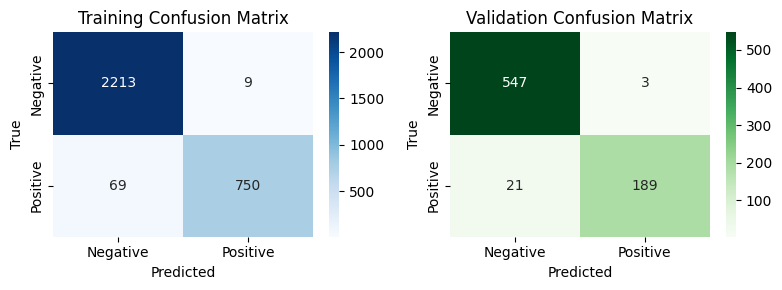

In [18]:
# Confusion matrices
cm_train = confusion_matrix(y_true_train, y_pred_train)
cm_val = confusion_matrix(y_true_val, y_pred_val)

plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1,2,2)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.savefig('confusion_matrices_train_val.png')
plt.show()

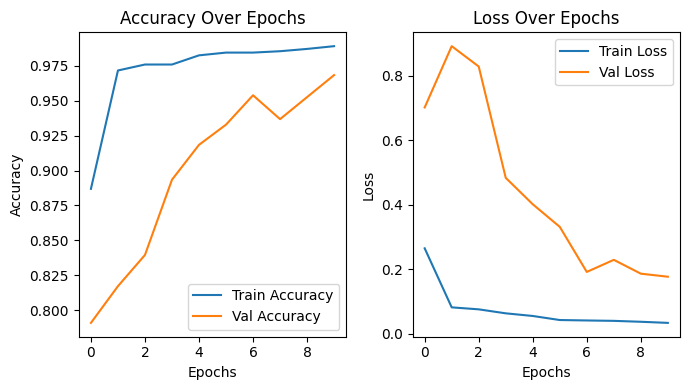

In [19]:
# ----------------------------
# 10. Accuracy & Loss Plots
# ----------------------------
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('accuracy_loss.png')
plt.show()

In [20]:
# import matplotlib.pyplot as plt
# import os
# import cv2
# import random

# # Paths for Positive and Negative subfolders
# positive_dir = os.path.join(dataset_dir, "Positive")
# negative_dir = os.path.join(dataset_dir, "Negative")

# # Pick 4 random samples from each class
# positive_samples = random.sample(os.listdir(positive_dir), 4)
# negative_samples = random.sample(os.listdir(negative_dir), 4)

# # Plot figure
# fig, axes = plt.subplots(2, 4, figsize=(10,5))

# # First row: Positive cracks
# for i, img_name in enumerate(positive_samples):
#     img_path = os.path.join(positive_dir, img_name)
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     axes[0, i].imshow(img)
#     axes[0, i].set_title("Positive")
#     axes[0, i].axis("off")

# # Second row: Negative (no cracks)
# for i, img_name in enumerate(negative_samples):
#     img_path = os.path.join(negative_dir, img_name)
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     axes[1, i].imshow(img)
#     axes[1, i].set_title("Negative")
#     axes[1, i].axis("off")

# plt.suptitle("Sample Bridge Crack Dataset Images", fontsize=14)
# plt.tight_layout()
# plt.savefig("sample_bridge_crack_images.png")
# plt.show()

In [21]:
def plot_combined_roc(train_ds, val_ds, model, num_classes):
    """Plot ROC curves for training and validation datasets together."""
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc
    from sklearn.preprocessing import label_binarize
    import numpy as np

    y_true_train, y_probs_train = get_probabilities_and_labels(train_ds, model)
    y_true_val, y_probs_val = get_probabilities_and_labels(val_ds, model)

    fig, ax = plt.subplots(figsize=(7,6))

    if num_classes == 2:
        fpr_train, tpr_train, _ = roc_curve(y_true_train, y_probs_train[:, 1])
        fpr_val, tpr_val, _ = roc_curve(y_true_val, y_probs_val[:, 1])
        auc_train = auc(fpr_train, tpr_train)
        auc_val = auc(fpr_val, tpr_val)

        ax.plot(fpr_train, tpr_train, lw=2, label=f"Training (AUC = {auc_train:.3f})")
        ax.plot(fpr_val, tpr_val, lw=2, label=f"Validation (AUC = {auc_val:.3f})")

    else:
        y_true_train_bin = label_binarize(y_true_train, classes=range(num_classes))
        y_true_val_bin = label_binarize(y_true_val, classes=range(num_classes))
        for i in range(num_classes):
            fpr_train, tpr_train, _ = roc_curve(y_true_train_bin[:, i], y_probs_train[:, i])
            fpr_val, tpr_val, _ = roc_curve(y_true_val_bin[:, i], y_probs_val[:, i])
            auc_train = auc(fpr_train, tpr_train)
            auc_val = auc(fpr_val, tpr_val)
            ax.plot(fpr_train, tpr_train, lw=2, label=f"Train Class {i} (AUC={auc_train:.3f})")
            ax.plot(fpr_val, tpr_val, lw=2, linestyle='--', label=f"Val Class {i} (AUC={auc_val:.3f})")

    ax.plot([0, 1], [0, 1], 'k--', lw=1)
    ax.set_title("ROC Curves - Training vs Validation")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="lower right", fontsize=8)
    ax.grid(True)

    return fig  # return figure object

In [22]:
def get_probabilities_and_labels(dataset, model):
    import numpy as np
    y_true = []
    y_pred_probs = []

    for images, labels in dataset:
        probs = model.predict(images, verbose=0)
        y_true.append(labels.numpy())
        y_pred_probs.append(probs)

    y_true = np.concatenate(y_true)
    y_pred_probs = np.concatenate(y_pred_probs)

    return y_true, y_pred_probs

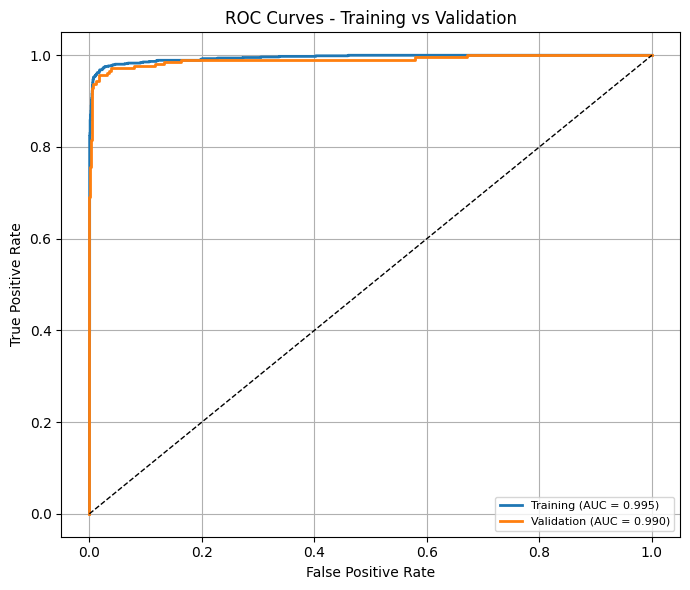

In [23]:
fig = plot_combined_roc(train_ds, val_ds, model, num_classes)
plt.tight_layout()
fig.savefig("ROC_curves.png")
plt.show()